# **The fifth in-class-exercise (40 points in total, 11/11/2021)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [1]:
# Write your code here
# read dataset
import pandas as pd
train_data = pd.read_csv('stsa-train.txt', sep = 'delimiter=', header = None, names = ['review'])
train_data = train_data['review'].str.split(' ', 1, expand = True)
train_data.columns = ['sentiment', 'review']

test_data = pd.read_csv('stsa-test.txt', sep = 'delimiter=', header = None, names = ['review'])
test_data = test_data['review'].str.split(' ', 1, expand = True)
test_data.columns = ['sentiment', 'review']

<ipython-input-1-09e80b698028>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv('stsa-train.txt', sep = 'delimiter=', header = None, names = ['review'])
<ipython-input-1-09e80b698028>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv('stsa-test.txt', sep = 'delimiter=', header = None, names = ['review'])


In [2]:
train_data.head()

,sentiment,review
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


In [3]:
test_data.head()

,sentiment,review
0,0,"no movement , no yuks , not much of anything ."
1,0,"a gob of drivel so sickly sweet , even the eag..."
2,0,"gangs of new york is an unapologetic mess , wh..."
3,0,"we never really feel involved with the story ,..."
4,1,this is one of polanski 's best films .


In [4]:
import nltk
import re
import string

from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
stopword = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()

def data_cleaning(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
  tokens = re.split('\W+',text)
  text = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ttp0037\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ttp0037\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Converting train_data into numerical usinf TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(analyzer = data_cleaning)
X_train_tfidf = tfidf_vector.fit_transform(train_data['review'])
print(X_train_tfidf.shape)

# saving the td-idf values in a dataframe
X_train_tfidf_df=pd.DataFrame(X_train_tfidf.toarray())
X_train_tfidf_df.columns=tfidf_vector.get_feature_names()
X_train_tfidf_df.head()

(6920, 13343)


,,100minute,103minute,10course,10th,10thgrade,10year,10yearold,112minute,12,...,ziyi,zoe,zombie,zombieland,zone,zoning,zoom,zwick,zzzzzzzzz,élan
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.048154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.029784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.049596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.048782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Converting test_data into numerical usinf TF-IDF
X_test_tfidf = tfidf_vector.fit_transform(test_data['review'])
print(X_test_tfidf.shape)

(1821, 6357)


In [7]:
!pip3 install xgboost

In [8]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

In [9]:
# machine learning algorithms

mnb = MultinomialNB()
svm = LinearSVC()
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

In [10]:
# create training and testing vars (80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf_df, train_data['sentiment'].values, test_size = 0.2, random_state = 42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(5536, 13343) (5536,)
(1384, 13343) (1384,)


### MultinomialNB

In [11]:
# fit a model on the training data
model_mnb = mnb.fit(X_train, y_train)
prediction_mnb = model_mnb.predict(X_test)
print('Accuracy %s' % accuracy_score(prediction_mnb,y_test))
print(classification_report(y_test,prediction_mnb))

Accuracy 0.7955202312138728
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384



In [12]:
# print the accuracy score
scores = cross_val_score(mnb, X_test, y_test, cv=10)
print("MultinominalNB:",scores.mean())

MultinominalNB: 0.7247054530288813


### SVM

In [13]:
# fit a model on the training data
model_svm = svm.fit(X_train,y_train)
prediction_svm = model_svm.predict(X_test)
print('Accuracy %s' % accuracy_score(prediction_svm, y_test))
print(classification_report(y_test, prediction_svm))

Accuracy 0.791907514450867
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [14]:
# print the accuracy score
scores = cross_val_score(svm, X_test, y_test, cv=10)
print("SVM:", scores.mean())

SVM: 0.7348034615785632


### KNN

In [15]:
# fit a model on the training data
model_knn = knn.fit(X_train,y_train)
prediction_knn = model_knn.predict(X_test)
print('Accuracy %s' % accuracy_score(prediction_knn, y_test))
print(classification_report(y_test, prediction_knn))

Accuracy 0.740606936416185
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384



In [16]:
# print the accuracy score
scores = cross_val_score(knn, X_test, y_test, cv=10)
print("KNN:", scores.mean())

KNN: 0.6675737670732979


### Decision Tree

In [17]:
# fit a model on the training data
model_dt = dt.fit(X_train,y_train)
prediction_dt = model_dt.predict(X_test)
print('Accuracy %s' % accuracy_score(prediction_dt, y_test))
print(classification_report(y_test, prediction_dt))

Accuracy 0.661849710982659
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       671
           1       0.66      0.71      0.68       713

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.66      1384
weighted avg       0.66      0.66      0.66      1384



In [18]:
# print the accuracy score
scores = cross_val_score(dt, X_test, y_test, cv=10)
print("Decision Tree:", scores.mean())

Decision Tree: 0.6105202794286312


### Random Forest

In [19]:
# fit a model on the training data
model_rf = rf.fit(X_train,y_train)
prediction_rf = model_rf.predict(X_test)
print('Accuracy %s' % accuracy_score(prediction_rf, y_test))
print(classification_report(y_test, prediction_rf))

Accuracy 0.7420520231213873
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       671
           1       0.71      0.83      0.77       713

    accuracy                           0.74      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.75      0.74      0.74      1384



In [20]:
# print the accuracy score
scores = cross_val_score(rf, X_test, y_test, cv=10)
print("Random Forest:", scores.mean())

Random Forest: 0.6835366489417163


### XGBoost

In [21]:
# fit a model on the training data
model_xgb = xgb.fit(X_train,y_train)
prediction_xgb = model_xgb.predict(X_test)
print('Accuracy %s' % accuracy_score(prediction_xgb, y_test))
print(classification_report(y_test, prediction_xgb))

C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 0.7182080924855492
              precision    recall  f1-score   support

           0       0.77      0.59      0.67       671
           1       0.69      0.84      0.75       713

    accuracy                           0.72      1384
   macro avg       0.73      0.71      0.71      1384
weighted avg       0.73      0.72      0.71      1384



In [22]:
# print the accuracy score
scores = cross_val_score(xgb, X_test, y_test, cv=10)
print("XGBoost:", scores.mean())

C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:43:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:44:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:44:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:44:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:45:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:45:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:45:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:46:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:46:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ttp0037\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost: 0.6618027317276612


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

### read dataset

In [21]:
#Write your code here.
import pandas as pd

amazon_review = pd.read_csv('Amazon_Unlocked_Mobile.csv')
amazon_review.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


### clean data

In [22]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [24]:
amazon_review['Reviews'] = amazon_review['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
amazon_review['Reviews'] = amazon_review['Reviews'].str.replace('[^\w\s]','')

stop = stopwords.words('english')
amazon_review['Reviews'] = amazon_review['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

nltk.download('wordnet')
amazon_review['Reviews'] = amazon_review['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
amazon_review['Reviews'].head()

<ipython-input-24-11b4241d39ad>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  amazon_review['Reviews'] = amazon_review['Reviews'].str.replace('[^\w\s]','')
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ttp0037\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    feel lucky found used phone u used hard phone ...
1    nice phone nice grade pantach revue clean set ...
2                                              pleased
3          work good go slow sometimes good phone love
4    great phone replace lost phone thing volume bu...
Name: Reviews, dtype: object

### Clustering

In [25]:
# TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf_vects = tfidf_vect.fit_transform(amazon_review['Reviews'])
terms= tfidf_vect.get_feature_names()

In [26]:
# to understand what kind of words generated as columns by BOW
terms[1:10]

['000',
 '0000',
 '00000',
 '000000',
 '0000000000',
 '00000000000',
 '0000000000finally',
 '0000000i',
 '000001']

In [28]:
# K Means
# using all processes jobs=-1 and k means++ for starting initilization advantage

from sklearn.cluster import KMeans
model = KMeans(n_clusters = 9,init='k-means++', n_jobs = -1,max_iter=10000, random_state=50)
model.fit(tfidf_vects)
from collections import Counter
Counter(model.labels_)

C:\Users\ttp0037\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Counter({5: 163558,
         2: 181133,
         3: 17213,
         6: 2551,
         4: 15841,
         0: 11589,
         8: 6622,
         7: 9221,
         1: 6112})

In [29]:
# cluster-center
labels = model.labels_
cluster_center=model.cluster_centers_

In [30]:
cluster_center

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.31014554e-06, 5.52080515e-06, 4.02183142e-06, ...,
        5.41501054e-06, 1.94193108e-06, 4.32056408e-06],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(amazon_review['Reviews'].values)
bow.shape

(413840, 125121)

In [32]:
# Top words in each cluster
topn_features = 8
centroids = model.cluster_centers_.argsort()[:, ::-1]
for cluster_num in range(7):
    key_features = [terms[i] for i in centroids[cluster_num, :topn_features]]
    print('Top words in CLUSTER  '+ str(cluster_num + 1))
    print('Key features:', key_features)
    print('-'*100)

Top words in CLUSTER  1
Key features: ['excellent', 'product', 'phone', 'condition', 'recommend', 'good', 'seller', 'price']
----------------------------------------------------------------------------------------------------
Top words in CLUSTER  2
Key features: ['nice', 'phone', 'price', 'product', 'good', 'love', 'work', 'great']
----------------------------------------------------------------------------------------------------
Top words in CLUSTER  3
Key features: ['work', 'perfect', 'good', 'product', 'ok', 'like', 'excelent', 'great']
----------------------------------------------------------------------------------------------------
Top words in CLUSTER  4
Key features: ['good', 'phone', 'product', 'price', 'work', 'far', 'thanks', 'quality']
----------------------------------------------------------------------------------------------------
Top words in CLUSTER  5
Key features: ['great', 'phone', 'work', 'product', 'price', 'condition', 'buy', 'good']
-------------------------

from sklearn import metrics
silhouette_score = metrics.silhouette_score(tfidf_vects, model.labels_, metric='euclidean')
silhouette_score

In [33]:
!pip install -U gensim

In [34]:
# DBSCAN
reviews = []
for i in amazon_review['Reviews']:
    reviews.append(str(i).split())

import gensim
w2v_model=gensim.models.Word2Vec(reviews, workers=4)

In [35]:
import numpy as np
vectors = []
for i in reviews:
    vector = np.zeros(100)
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except:
            pass
    vector /= count
    vectors.append(vector)  
vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)

<ipython-input-35-f18d8814ae96>:13: RuntimeWarning: invalid value encountered in true_divide
  vector /= count


In [36]:
from sklearn.cluster import DBSCAN

# Computing 200th Nearest neighbour distance
minPts = 2*100

# This function return the number in the array just greater than or equal to itself.
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

# Returns the distance of 200th nearest neighbour
def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
            
# Dist 199 contains the distance of 200th nearest neighbour.    
    return dists[199]



In [37]:
# Computing the 200th nearest neighbour distance of some point the dataset:

neighbor = []
for val in vectors[:1000]:
    neighbor.append(compute200thnearestneighbour(val, vectors[:1000]))
neighbor.sort()

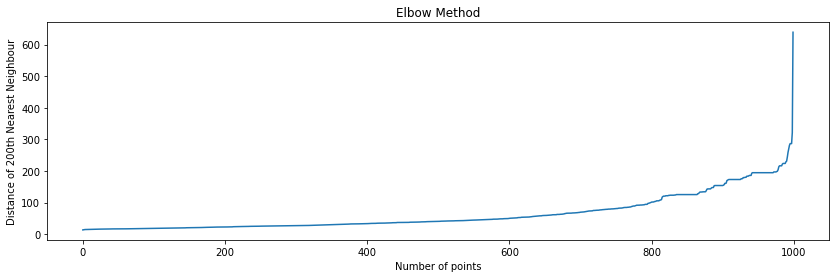

In [38]:
# Plotting for the Elbow Method

%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(14,4))
plt.title("Elbow Method")
plt.plot([x for x in range(len(neighbor))], neighbor)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
'''
Dear Professor,

I don't know why I cannot run 3 code blocks below. 
I tried on laptop and desktop as well as google colab, but they didn't work out.
It keeps running and running.
I will reinstall the Jupiter Notebook or any environment later on.

Thank you for your understanding!

'''

In [ ]:
# Training DBSCAN

from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 3, min_samples = minPts, n_jobs=-1)
model.fit(vectors)


In [ ]:
amazon_review['DBSCAN Cluster Labels'] = model.labels_

# Finding the number of reviews in each cluster
print(amazon_review.groupby(['DBSCAN Cluster Labels'])['Reviews'].count())

In [ ]:
# Clustering Hierarchical

import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))

# cut at 30 to get 5 clusters
plt.axhline(y=35)

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [2]:
#You can write you answer here. (No code needed)
'''
K-means clustering uses a pre-specified  number of clusters, so it specilize different sizes and shapes clusters.

DBSCAN works on density and clusters points are densely packed together and labels the other points as noise.

Hierarchical clustering: ease of handling of any forms similarity or distance. It gives a visual indication of how clusters relate each other.
'''


